<a href="https://colab.research.google.com/github/vijayantony961/Bharat-Intern/blob/main/cats_vs_dogs_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

cp: cannot stat 'kaggle.json': No such file or directory


In [2]:
!kaggle datasets download -d salader/dogs-vs-cats

Dataset URL: https://www.kaggle.com/datasets/salader/dogs-vs-cats
License(s): unknown
dogs-vs-cats.zip: Skipping, found more recently modified local copy (use --force to force download)


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [4]:
import zipfile
zip_ref=zipfile.ZipFile('/content/dogs-vs-cats.zip','r')
zip_ref.extractall('/content')
zip_ref.close()

In [5]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D,BatchNormalization,Dropout
from keras.layers import LeakyReLU

In [6]:
train_ds = keras.utils.image_dataset_from_directory(
    directory='/content/train',
    labels="inferred",
    label_mode="int",
    batch_size=32,
    image_size=(256,256)
)

validation_ds = keras.utils.image_dataset_from_directory(
    directory='/content/test',
    labels="inferred",
    label_mode="int",
    batch_size=32,
    image_size=(256,256)
)

Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.


In [7]:
# Normalize
def process(image, label):
    image = tf.cast(image/255, tf.float32)
    return image, label

train_ds = train_ds.map(process)
validation_ds = validation_ds.map(process)

In [8]:
model = Sequential()

model.add(Conv2D(32,kernel_size=(3,3), padding="valid", activation="relu", input_shape=(256,256,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2), strides=2,padding="valid"))

model.add(Conv2D(64,kernel_size=(3,3), padding="valid", activation="relu"))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2), strides=2,padding="valid"))

model.add(Conv2D(128,kernel_size=(3,3), padding="valid", activation="relu"))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2), strides=2,padding="valid"))

model.add(Flatten())

model.add(Dense(128, activation="relu"))
model.add(Dropout(0.1))
model.add(Dense(64, activation="relu"))
model.add(Dropout(0.1))
model.add(Dense(1, activation="sigmoid"))

In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 batch_normalization (Batch  (None, 254, 254, 32)      128       
 Normalization)                                                  
                                                                 
 max_pooling2d (MaxPooling2  (None, 127, 127, 32)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 batch_normalization_1 (Bat  (None, 125, 125, 64)      256       
 chNormalization)                                                
                                                        

In [10]:
model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])

In [11]:
history = model.fit(train_ds, epochs=5, validation_data=validation_ds)

Epoch 1/5
625/625 [==============================] - 76s 109ms/step - loss: 1.0154 - accuracy: 0.6016 - val_loss: 0.6189 - val_accuracy: 0.6628
Epoch 2/5
625/625 [==============================] - 67s 107ms/step - loss: 0.5591 - accuracy: 0.7153 - val_loss: 0.5395 - val_accuracy: 0.7076
Epoch 3/5
625/625 [==============================] - 64s 102ms/step - loss: 0.4930 - accuracy: 0.7648 - val_loss: 0.4695 - val_accuracy: 0.7736
Epoch 4/5
625/625 [==============================] - 67s 106ms/step - loss: 0.4269 - accuracy: 0.8020 - val_loss: 0.4773 - val_accuracy: 0.7892
Epoch 5/5
625/625 [==============================] - 65s 104ms/step - loss: 0.3629 - accuracy: 0.8340 - val_loss: 0.5163 - val_accuracy: 0.7598


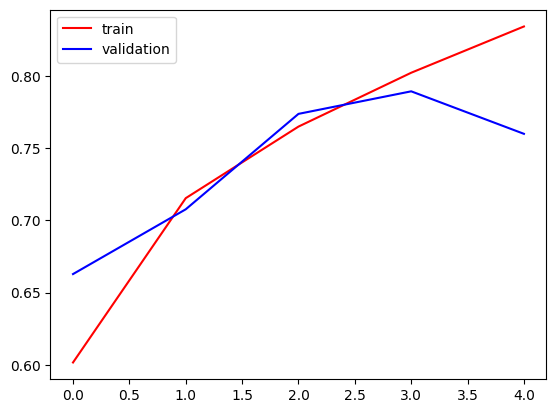

In [12]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

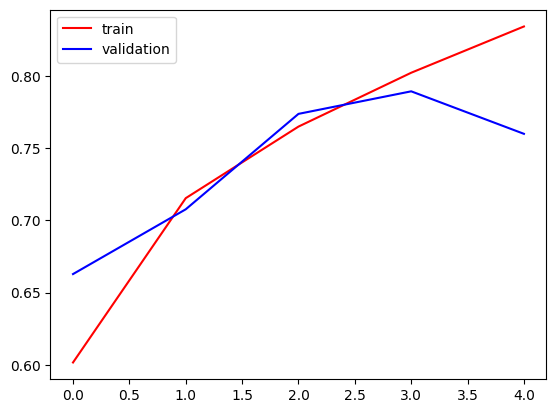

In [13]:
plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

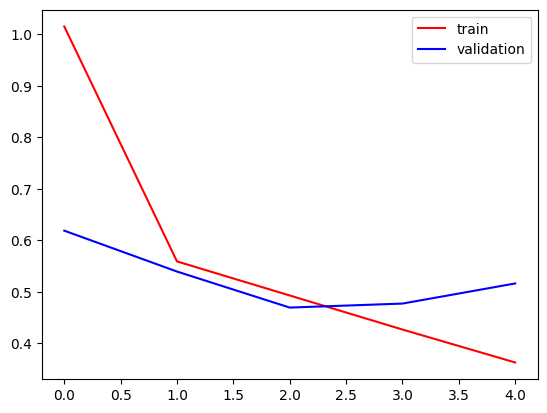

In [14]:
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()

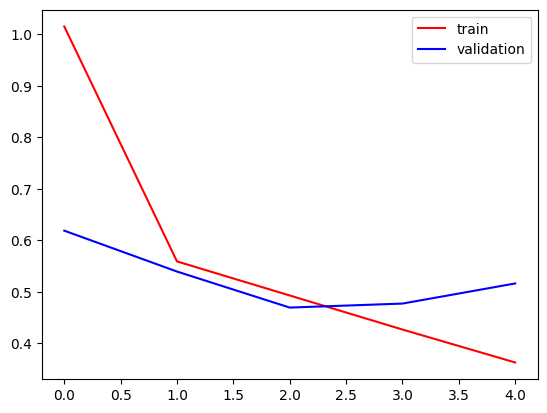

In [15]:
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()

In [16]:
import cv2

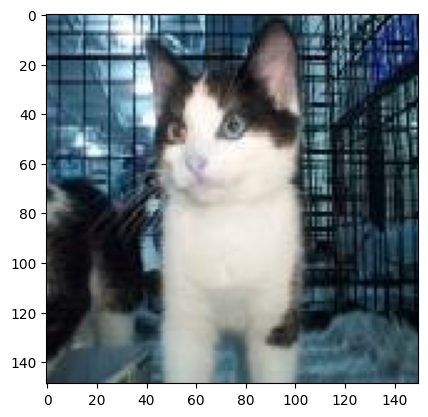

In [17]:
test_img = cv2.imread('/content/train/cats/cat.1000.jpg')
plt.imshow(test_img)

In [18]:
test_img.shape

(149, 150, 3)

In [19]:
test_img = cv2.resize(test_img,(256,256))
test_input = test_img.reshape((1,256,256,3))
model.predict(test_input)

1/1 [==============================] - 0s 487ms/step


array([[1.0856915e-17]], dtype=float32)

In [20]:
import cv2

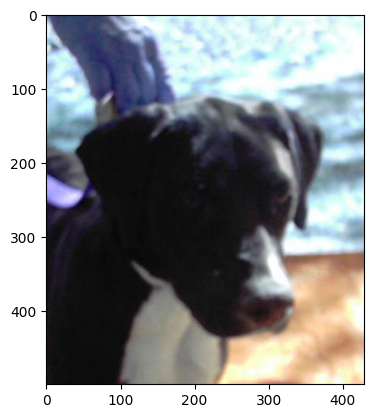

In [21]:
test_img = cv2.imread('/content/train/dogs/dog.10007.jpg')
plt.imshow(test_img)

In [22]:
test_img.shape

(499, 429, 3)

In [23]:
test_img = cv2.resize(test_img,(256,256))
test_input = test_img.reshape((1,256,256,3))
model.predict(test_input)

1/1 [==============================] - 0s 17ms/step


array([[0.494833]], dtype=float32)